In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("./MiningProcess_Flotation_Plant_Database.csv", decimal=",",)

In [4]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
df.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [6]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [7]:
print("Number of rows before removing duplicates:", len(df))
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", len(df))

Number of rows before removing duplicates: 737453
Number of rows after removing duplicates: 736282


In [10]:
cols = df.columns

In [15]:
cols = np.array(cols)

In [23]:
# cols

In [24]:
# cols = np.delete(cols, np.argwhere(cols == "date"))

In [20]:
cols

array(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'], dtype=object)

In [22]:
# for x in cols:
#     sns.displot(data=df, x=x, kde=True)
#     plt.show()

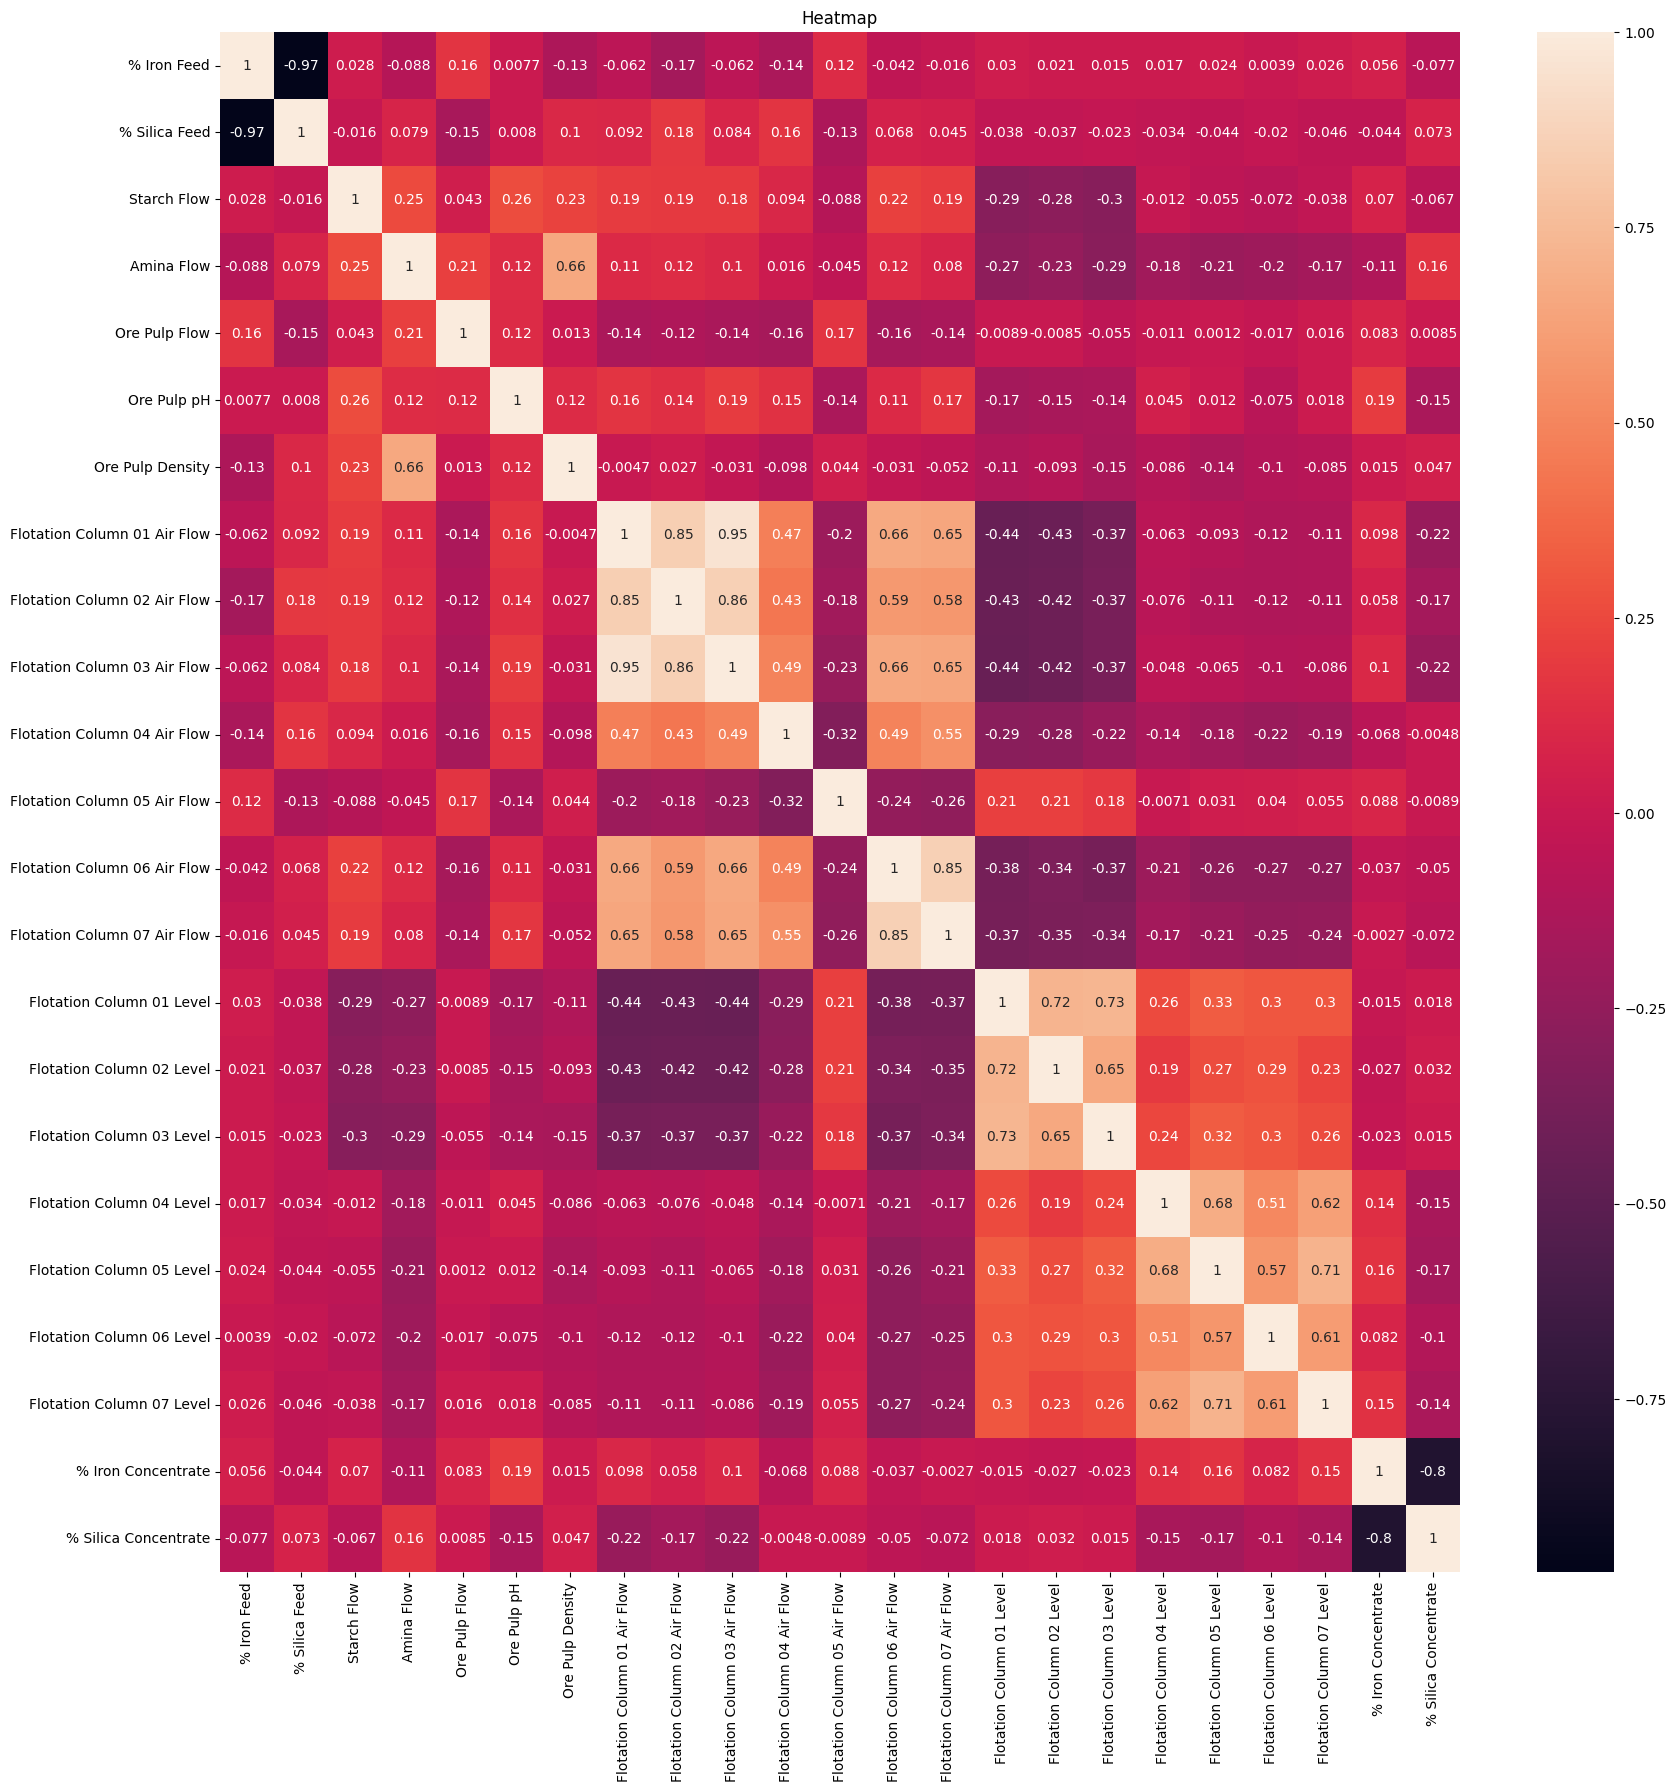

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

sns.pairplot(df[['% Iron Concentrate', 'Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow']], diag_kind='kde')
plt.show()

### RFE

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the target variable
target = df['% Iron Concentrate']

# Define the features to be used for prediction
features = df.drop(['% Iron Concentrate', '% Silica Concentrate', 'date'], axis=1)

# Initialize a linear regression model
model = LinearRegression()

# Initialize an RFE object with 5 features
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE object to the data
rfe.fit(features, target)

# Print the ranking of each feature
print("Feature ranking:", rfe.ranking_)

# Print the selected features
selected_features = features.columns[rfe.support_]
print("Selected features:", selected_features)


Feature ranking: [ 1  2 17  7  6  1  1  3  8  5  1  1  4 10 16 15 12 14  9 13 11]
Selected features: Index(['% Iron Feed', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow'],
      dtype='object')


### RFECV

In [10]:
X = df.drop(columns=['% Iron Concentrate', '% Silica Concentrate', 'date'])
y = df['% Iron Concentrate']

# Create a linear regression model
model = LinearRegression()

# Create a recursive feature elimination object with cross-validation
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

# Fit the recursive feature elimination object to the data
rfecv.fit(X, y)

# Print the selected features and their rankings
print("Selected features: ", X.columns[rfecv.support_])
print("Feature rankings: ", rfecv.ranking_)

Selected features:  Index(['% Iron Feed', '% Silica Feed', 'Amina Flow', 'Ore Pulp Flow',
       'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow',
       'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
       'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow',
       'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
       'Flotation Column 05 Level'],
      dtype='object')
Feature rankings:  [1 1 8 1 1 1 1 1 1 1 1 1 1 1 7 6 3 5 1 4 2]


#### RFE VS RFECV

Both RFE and RFECV are effective feature selection techniques, but the choice between them depends on the specific problem and dataset being considered.

RFE (Recursive Feature Elimination) selects a subset of features by recursively considering smaller and smaller sets of features. At each step, it trains a model and eliminates the feature with the lowest weight or importance. The process continues until a desired number of features is reached.

RFECV (Recursive Feature Elimination with Cross-Validation) is similar to RFE, but it uses cross-validation to evaluate the performance of different feature subsets. It starts with all the features and recursively eliminates the features with the lowest importance score. After each elimination, it evaluates the performance of the model using cross-validation, and stops when the performance no longer improves. RFECV can give a more accurate estimate of the optimal number of features to select, as it takes into account the variance in model performance due to the different subsets of features.

In general, if computational resources are not a constraint, RFECV can be a more robust approach as it considers the variance in model performance due to different subsets of features. However, if the dataset is small or the number of features is not very large, RFE can also provide good results.

In [11]:
X = df[X.columns[rfecv.support_]]

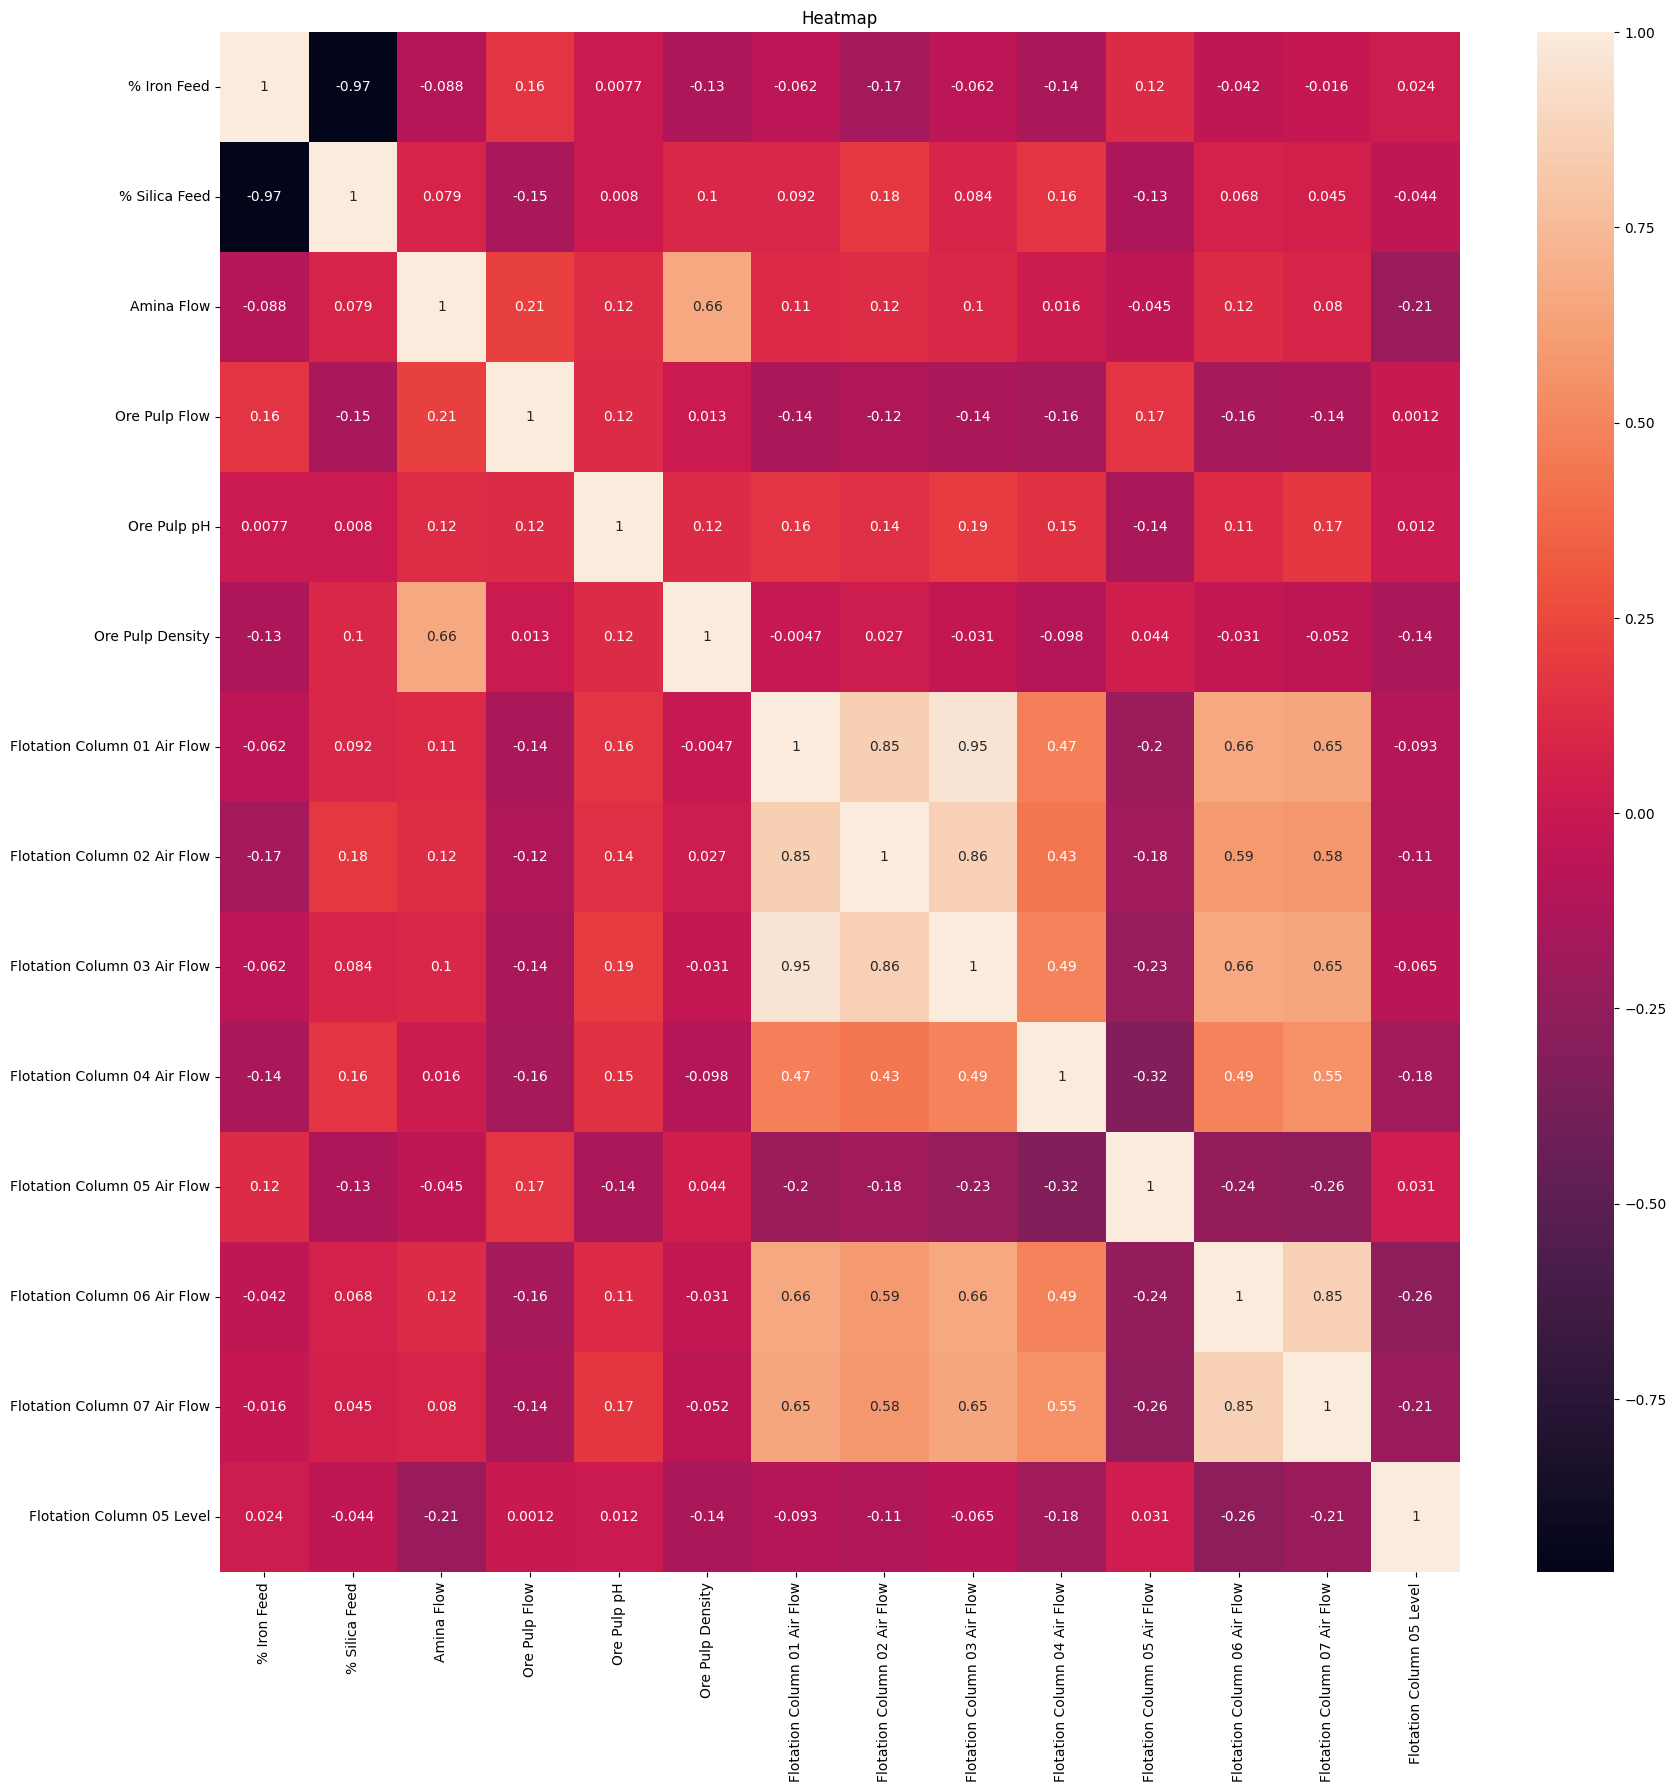

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True)
plt.title("Heatmap")
plt.show()

In [13]:
X.head()

,% Iron Feed,% Silica Feed,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 05 Level
0,55.2,16.98,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,502.255
1,55.2,16.98,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,496.363
2,55.2,16.98,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,484.411
3,55.2,16.98,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,471.411
4,55.2,16.98,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,462.598


In [14]:
y.head()

0    66.91
1    66.91
2    66.91
3    66.91
4    66.91
Name: % Iron Concentrate, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = xgb.XGBRegressor()

In [22]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

In [ ]:
# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
model = xgb.XGBRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

### Trial

In [18]:
xgb_model1 = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 280, max_depth=20, n_jobs=-1)
xgb_model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=280, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [20]:
y_pred = xgb_model1.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

In [23]:
print("The Mean Absolute Error is = ", rf_mae)
print("The Mean Squared Error is = ", rf_mse)
print("The value of R2 is = ", rf_r2)

The Mean Absolute Error is =  0.18946412800810614
The Mean Squared Error is =  0.10612858072089715
The value of R2 is =  0.9150561164600027
